<h1> Pequeno projeto com algoritimos do sklearn para o dataframe IRIS </h1>

<p> O objetivo é aplicar diferentes conceitos aprendidos para selecionar os dois melhores algoritimos clássicos de classificação no irisDataset, e após isso desenvolver um pequeno sistema de classificação das flores abordadas no problema </p>

<p> O propósito deste projeto é apenas aplicar conceitos de IA para estudos, não possuindo nenhum fim comercial. </p>

In [ ]:
##imports iniciais necessários para a inicialização do projeto.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
from sklearn import tree as tr
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from yellowbrick.classifier import ConfusionMatrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from scipy.stats import shapiro, f_oneway
from statsmodels.stats.multicomp import MultiComparison
import pickle



<h3> <b>1 Verificando se é necessário realizar algum pré-procesamento de dados </b>

<p> A etapa de pré-procesamento de dados é de extrema importância, para adequar os dados aos algoritimos de IA e evitarmos problemas como overfitting e undefitting. </p>

In [ ]:
#Criando um dataframe com o load_iris disponível na biblioteca do sktlearn
iris = load_iris()

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

df['target'] = iris.target

df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
143,6.8,3.2,5.9,2.3,2
104,6.5,3.0,5.8,2.2,2
34,4.9,3.1,1.5,0.2,0
141,6.9,3.1,5.1,2.3,2
149,5.9,3.0,5.1,1.8,2


In [ ]:
#Verifica os valores estátisticos do banco
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


<Axes: xlabel='target', ylabel='count'>

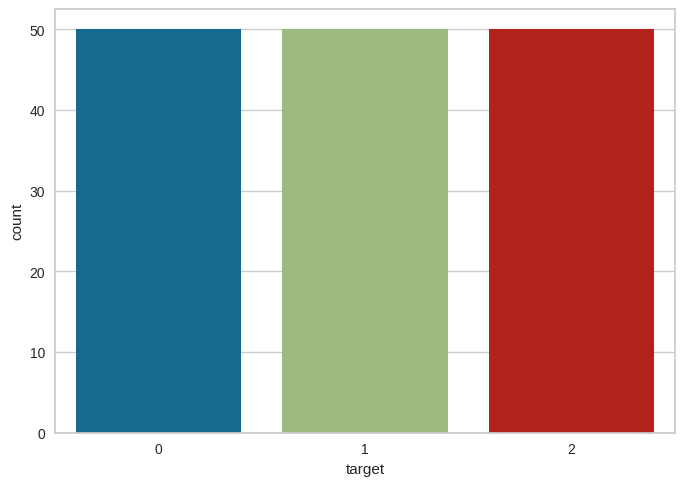

In [ ]:
#Verifica a distribuição de dados do banco
sns.countplot(x=df["target"])

In [ ]:
#verifica se a dados com valores nulos ou faltantes
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [ ]:
#Verifica se a algum dado com números negativos
df.loc[df["sepal length (cm)"] < 0]


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target


In [ ]:
df.loc[df["sepal width (cm)"] < 0]


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target


In [ ]:
df.loc[df["petal length (cm)"] < 0]


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target


In [ ]:
df.loc[df["petal width (cm)"] < 0]


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target


In [ ]:
df.loc[df["target"] < 0]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target


In [ ]:
# Separando os dados em dados e target
X = df.iloc[: ,0:4]
y = df["target"]


In [ ]:
#Avaliar valores de acurácia, precisão e recall usando o train_test_split após encontrar os melhores parâmetros.
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42)

#Apenas importando todas os algoritimos de IA e treinando-os para verificar qual possui o melhor desempenho
nv = GaussianNB()
forest = RandomForestClassifier()
tree = DecisionTreeClassifier()
KNN = KNeighborsClassifier()
svm = SVC()



In [ ]:
#Utilizando o grid_search para tentar encontrar os melhores parâmetros para a árvore de decisão.
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 8, 10],
    'min_samples_leaf': [1, 2, 3, 4]
}

grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='accuracy')


grid_search.fit(X, y)


best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f'Melhores parâmetros: {best_params}')
print(best_score)

Melhores parâmetros: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
0.9733333333333334


In [ ]:
#Encontrando os melhores parâmetros para o random forest usando o random search uma vez que o grid search demorou muito para ser processado.
param_grid = {
    'n_estimators': [10, 50, 100, 200, 1000],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 8, 10],
    'min_samples_leaf': [1, 2, 3, 4]
}


random_search = RandomizedSearchCV(forest, param_distributions=param_grid, n_iter=10, cv=5, scoring='accuracy', random_state=42)

random_search.fit(X, y)

best_params = random_search.best_params_
best_score = random_search.best_score_
print(f'Melhores parâmetros: {best_params}')
print(f'Melhor pontuação: {best_score}')

Melhores parâmetros: {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 40, 'criterion': 'entropy'}
Melhor pontuação: 0.96


In [ ]:
#Encontrando os melhores parâmetros para o KNN
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}


grid_search = GridSearchCV(KNN, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X, y)

best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f'Melhores parâmetros: {best_params}')
print(best_score)

Melhores parâmetros: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
0.9800000000000001


In [ ]:
#Encontrando os melhores parâmetros para o SVM
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.1, 1, 10]
}


grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X, y)

best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f'Melhores parâmetros: {best_params}')
print(best_score)

Melhores parâmetros: {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
0.9866666666666667


In [ ]:
#Verificando eficiencia usando o Train_test_split usando os parametros padrões. Como o naive_bayes não possui hiperparâmetros
# relevantes não foi usando o grid_search para o mesmo.

nv.fit(X_train, y_train)
y_pred = nv.predict(X_test)

print(classification_report(y_test, y_pred))




              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



In [ ]:
#Verificando eficiencia usando o Train_test_split usando os melhores parâmetros da árvore de decisão
tree = DecisionTreeClassifier(criterion = 'entropy', max_depth =  10, min_samples_leaf = 4, min_samples_split = 2, splitter = 'random')

tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



In [ ]:
#Verificando eficiencia usando o Train_test_split usando o random_forest
forest = RandomForestClassifier(n_estimators = 10, min_samples_split = 8, min_samples_leaf = 2, max_depth = 40, criterion = 'gini')

forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [ ]:
#Verificando eficiencia usando o Train_test_split usando o KNN
KNN = KNeighborsClassifier(metric = 'euclidean', n_neighbors = 7,  weights = 'uniform')

KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [ ]:
#Verificando eficiencia usando o Train_test_split usando o SVM
svm = SVC(C = 0.1, gamma ='scale', kernel = 'poly')

svm.fit(X_train, y_train)
y_pred = KNN.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



<h3> Ánalise do resultados </h3>

<p> Ao garantir que os melhores parâmetros fossem utilizados para o modelo verificamos que com exeção do Naive bayes todos ficaram com uma acurácia de 100% sendo assim, em teoria não conseguiriamos definir o melhor modelo de IA para os algoritimos clássicos neste problema. Obviamente caso estes fossem colocados em produção provavelmente já obteriamos um bom resultado, já que se trata de um problema relativamente simples, porém para fins de estudos iremos realizar uma nova rodada de testes desta vez utilizando a validação cruzada para obter resultados mais precisos e tentar garantir o melhor algoritmo.

In [ ]:
# Faz o processo de validação cruzada
def validacao_cruzada(algoritimo, X, y, loops=30):

  lista_resultados = []

  for i in range(loops):

      kfold = KFold(n_splits=10, shuffle=True, random_state=i)

      scores = cross_val_score(algoritimo, X, y, cv=kfold)

      lista_resultados.append(scores.mean())

  return lista_resultados


In [ ]:
# Pega as 30 médias de resultados da validação cruzada.
resultados_nv = validacao_cruzada(nv, X, y)
resultados_arvore = validacao_cruzada(tree, X, y)
resultados_floresta = validacao_cruzada(forest, X, y)
resultados_knn = validacao_cruzada(KNN, X, y)
resultados_svm = validacao_cruzada(svm, X,y)


In [ ]:
# Cria um dataFrame com todos os resultados
resultados = pd.DataFrame({"naive_bayes": resultados_nv, "árvore": resultados_arvore, "floresta": resultados_floresta, "KNN": resultados_knn, "SVM": resultados_svm})

In [ ]:
# Verifica as métricas gerais dos resultados
resultados.describe()

,naive_bayes,árvore,floresta,KNN,SVM
count,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.952667,0.945778,0.954667,0.967111,0.976000
std,0.002684,0.016305,0.008099,0.007618,0.005425
min,0.946667,0.913333,0.940000,0.953333,0.966667
25%,0.953333,0.933333,0.946667,0.966667,0.973333
50%,0.953333,0.946667,0.953333,0.966667,0.973333
75%,0.953333,0.960000,0.960000,0.973333,0.980000
max,0.960000,0.973333,0.966667,0.980000,0.986667


In [ ]:
#Realiza o teste de shapiro para verificar se os dados estão em uma distribuição normal com aplha de 0,05

shapiro(resultados_nv) , shapiro(resultados_arvore) , shapiro(resultados_floresta), shapiro(resultados_knn), shapiro(resultados_svm)


(ShapiroResult(statistic=0.5451681017875671, pvalue=1.6643928901771687e-08),
 ShapiroResult(statistic=0.9591338634490967, pvalue=0.2943279445171356),
 ShapiroResult(statistic=0.909500002861023, pvalue=0.014454829506576061),
 ShapiroResult(statistic=0.8962798118591309, pvalue=0.00681931572034955),
 ShapiroResult(statistic=0.8559591770172119, pvalue=0.0008285074727609754))

<p> Como indicado pelo shapiro apenas o KNN e o SVM apresentaram uma distribuição diferente da normal, vamos verificar no gráfico como é a distribuição destes dois</p>

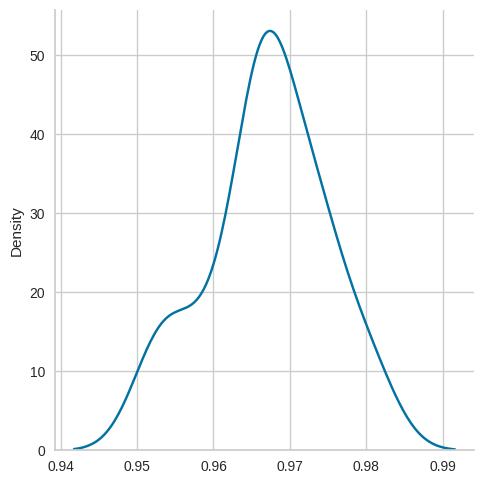

In [ ]:
sns.displot(resultados_knn, kind="kde")

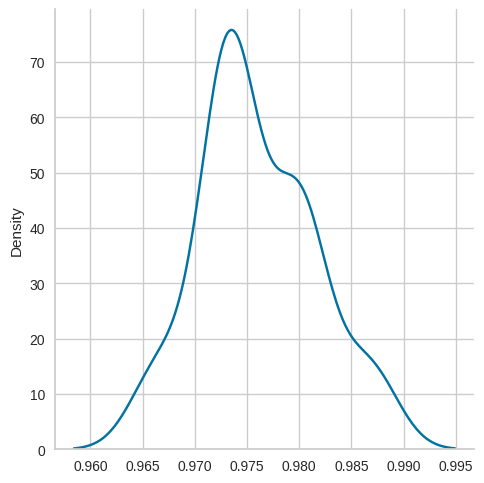

In [ ]:
sns.displot(resultados_svm, kind="kde")

<p> Embora de acordo com o shapiro não tenhamos obtido uma distribuição normal para o SVM e o KNN, podemos observar que os gráficos seguem um formato de sino, muito próximo da distribuição normal, e para facilitarmos a avaliação iremos considera-los como distribuições normais também. </p>

In [ ]:
#Utiliza o teste de tukey para verificar se existe diferenças estátisticas entre os dados.
_, p = f_oneway(resultados_nv, resultados_arvore, resultados_floresta, resultados_knn, resultados_svm)

In [ ]:
# Resultado em notação científica e negativo, ou seja iremos rejeitar a ideia de que não a firença nos dados
print(p)

5.116435494602479e-27


In [ ]:
# Concatenado resultados
resultados_algoritmos = {'accuracy': np.concatenate([resultados_arvore, resultados_floresta, resultados_knn, resultados_svm, resultados_nv]),
                         'algoritmo': ['arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore',
                          'random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest',
                          'knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn',
                          'svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm',
                          'naive_bayes','naive_bayes','naive_bayes','naive_bayes','naive_bayes','naive_bayes','naive_bayes','naive_bayes','naive_bayes','naive_bayes','naive_bayes','naive_bayes','naive_bayes','naive_bayes','naive_bayes','naive_bayes','naive_bayes','naive_bayes','naive_bayes','naive_bayes','naive_bayes','naive_bayes','naive_bayes','naive_bayes','naive_bayes','naive_bayes','naive_bayes','naive_bayes','naive_bayes','naive_bayes']}

In [ ]:
#Criando um dataFrame para os resultados
resultados_df = pd.DataFrame(resultados_algoritmos)
resultados_df

,accuracy,algoritmo
0,0.933333,arvore
1,0.946667,arvore
2,0.933333,arvore
3,0.946667,arvore
4,0.946667,arvore
...,...,...
145,0.953333,naive_bayes
146,0.946667,naive_bayes
147,0.953333,naive_bayes
148,0.953333,naive_bayes


In [ ]:
#Compara os algoritimos
compara_algoritmos = MultiComparison(resultados_df['accuracy'], resultados_df['algoritmo'])


In [ ]:
#Verifica se a diferença estatistica relevante entre os resultados
teste_estatistico = compara_algoritmos.tukeyhsd()
print(teste_estatistico)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1        group2    meandiff p-adj   lower   upper  reject
------------------------------------------------------------------
       arvore           knn   0.0213    0.0  0.0147  0.0279   True
       arvore   naive_bayes   0.0069 0.0354  0.0003  0.0135   True
       arvore random_forest   0.0089 0.0025  0.0023  0.0155   True
       arvore           svm   0.0302    0.0  0.0236  0.0368   True
          knn   naive_bayes  -0.0144    0.0  -0.021 -0.0079   True
          knn random_forest  -0.0124    0.0  -0.019 -0.0059   True
          knn           svm   0.0089 0.0025  0.0023  0.0155   True
  naive_bayes random_forest    0.002  0.918 -0.0046  0.0086  False
  naive_bayes           svm   0.0233    0.0  0.0167  0.0299   True
random_forest           svm   0.0213    0.0  0.0147  0.0279   True
------------------------------------------------------------------


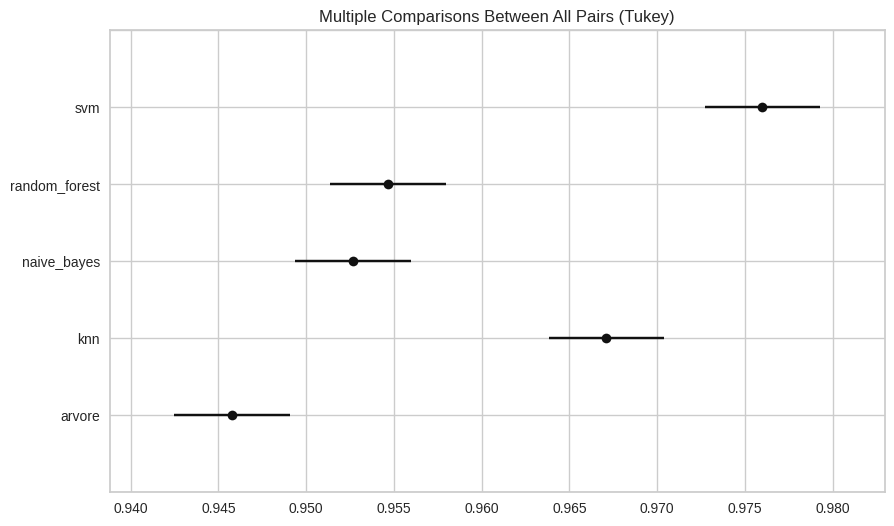

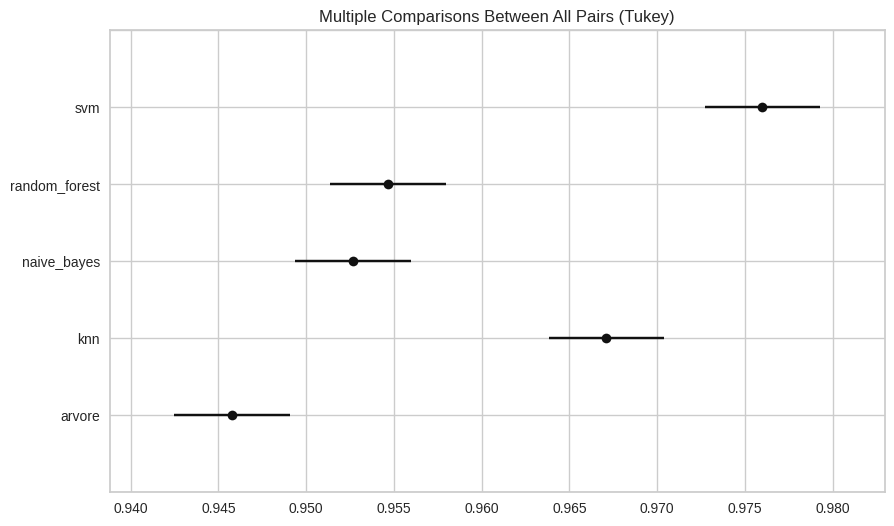

In [ ]:
# Verifca qual é o algoritmo com o melhor resultado
teste_estatistico.plot_simultaneous()

<p> Como observado o algoritimo SVM apresentou um ótimo desempenho em comparação ao algoritimos restantes, o que significa que ele é estatisticamente comprovado superior para o dataSet iris </p>

In [ ]:
#Salvar o classificado para coloca-lo em produção
svm = SVC(C = 0.1, gamma ='scale', kernel = 'poly')

svm.fit(X, y)



SVC(C=0.1, kernel='poly')

In [ ]:
pickle.dump(svm, open("classificador_svm.sav" , "wb"))